In [1]:
#!pip install plotly
#!pip install wordcloud
#pip install --upgrade scikit-learn
#conda update scikit-learn
#!pip install --upgrade scikit-learn
#!pip install --upgrade imblearn
#pipevn install imbalanced-learn
#pip install --upgrade category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud

# import necessary libraries and read data set

In [3]:
df =pd.read_csv('USvideos.csv')

In [4]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [5]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [6]:
df['country'] = 'USA'

In [7]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA


In [8]:
df1 =pd.read_csv('CAvideos.csv')

In [9]:
df1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [10]:
df1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [11]:
df1['country'] = 'CAN'

In [12]:
df1.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CAN
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CAN


دمجنا بين امريكا وكندا 

In [13]:
frames = [df, df1]

In [14]:
video = pd.concat(frames)

In [15]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,CAN
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,CAN
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,CAN
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,CAN


In [16]:
video.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country'],
      dtype='object')

In [17]:
video.shape

(81830, 17)

In [18]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                81830 non-null  object
 1   trending_date           81830 non-null  object
 2   title                   81830 non-null  object
 3   channel_title           81830 non-null  object
 4   category_id             81830 non-null  int64 
 5   publish_time            81830 non-null  object
 6   tags                    81830 non-null  object
 7   views                   81830 non-null  int64 
 8   likes                   81830 non-null  int64 
 9   dislikes                81830 non-null  int64 
 10  comment_count           81830 non-null  int64 
 11  thumbnail_link          81830 non-null  object
 12  comments_disabled       81830 non-null  bool  
 13  ratings_disabled        81830 non-null  bool  
 14  video_error_or_removed  81830 non-null  bool  
 15  de

In [19]:
video['publish_time'] = pd.to_datetime(video['publish_time']
                                       , errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [20]:
video.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA


In [21]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                81830 non-null  object        
 1   trending_date           81830 non-null  object        
 2   title                   81830 non-null  object        
 3   channel_title           81830 non-null  object        
 4   category_id             81830 non-null  int64         
 5   publish_time            81830 non-null  datetime64[ns]
 6   tags                    81830 non-null  object        
 7   views                   81830 non-null  int64         
 8   likes                   81830 non-null  int64         
 9   dislikes                81830 non-null  int64         
 10  comment_count           81830 non-null  int64         
 11  thumbnail_link          81830 non-null  object        
 12  comments_disabled       81830 non-null  bool  

In [22]:
video['trending_date'] = video['trending_date'].astype('str') 
date_pieces = (video['trending_date']
                   .str.split('.'))
video['trending_Year'] = date_pieces.str[0].astype(int)
video['trending_Day'] = date_pieces.str[1].astype(int)
video['trending_Month'] = date_pieces.str[2].astype(int)

In [23]:
video.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_Year,trending_Day,trending_Month
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA,17,14,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA,17,14,11


In [24]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_Year,trending_Day,trending_Month
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA,17,14,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA,17,14,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA,17,14,11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA,17,14,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA,17,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,CAN,18,14,6
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,CAN,18,14,6
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,CAN,18,14,6
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,CAN,18,14,6


In [25]:
video['publish_hour']=video['publish_time'].dt.hour

In [26]:
video['publish_year']=video['publish_time'].dt.year

In [27]:
video['publish_Month']=video['publish_time'].dt.month

In [28]:
video['score'] = ((video.comment_count / video.views)*(video.likes-(1.5 * video.dislikes)))

In [29]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40880
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                81830 non-null  object        
 1   trending_date           81830 non-null  object        
 2   title                   81830 non-null  object        
 3   channel_title           81830 non-null  object        
 4   category_id             81830 non-null  int64         
 5   publish_time            81830 non-null  datetime64[ns]
 6   tags                    81830 non-null  object        
 7   views                   81830 non-null  int64         
 8   likes                   81830 non-null  int64         
 9   dislikes                81830 non-null  int64         
 10  comment_count           81830 non-null  int64         
 11  thumbnail_link          81830 non-null  object        
 12  comments_disabled       81830 non-null  bool  

In [30]:
conditions = [
    (video['views'] >= 100000) & (video['score'] >= 300),#y3
    (video['views'] >= 100000) & (video['score'].between(0,300)),#y2
    (video['views'] >= 100000) & (video['score'] < 0), #y1
    ((video['views'] < 100000))#y0
   ]
values = ['Trending','not Trend','not Trend','not Trend']     
video['video_type'] = np.select(conditions,values)

In [31]:
conditions1 = [
    (video['video_type'] == "Trending"),
    (video['video_type'] == "not Trend")
    
   ]
values1 = ['1','0']  
video['video_type_no'] = np.select(conditions1,values1)

In [32]:
video['video_type_no'].value_counts()

0    68131
1    13699
Name: video_type_no, dtype: int64

# Data Analysis and Visualization

<AxesSubplot:>

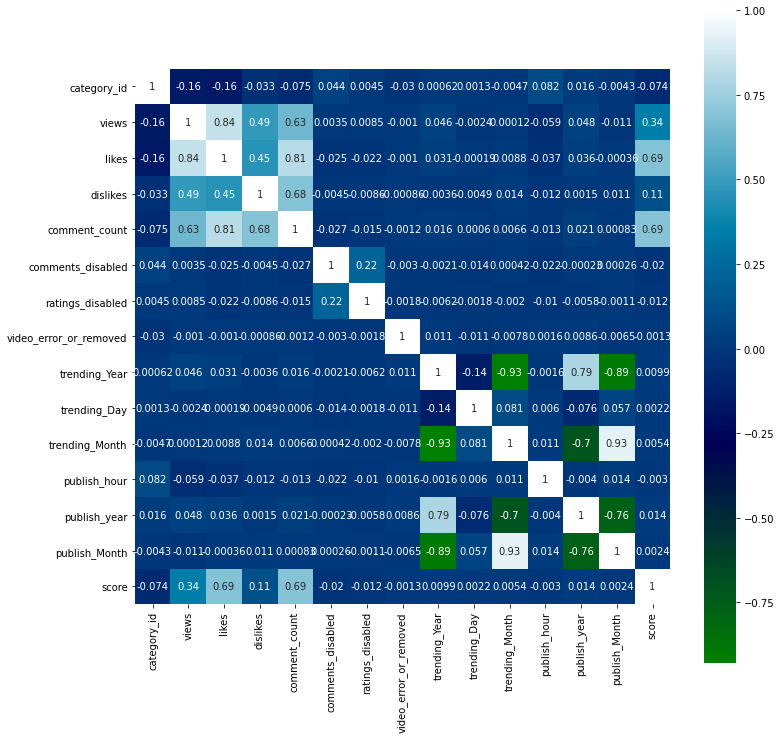

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(video.corr(),square=True,annot=True,cmap='ocean')

 What is the most watched channel?

In [34]:
top_10_channel = video["channel_title"].value_counts() 
top_10_channel.head(10)

CNN                                       362
The Late Show with Stephen Colbert        359
ESPN                                      344
TheEllenShow                              343
FBE                                       337
The Tonight Show Starring Jimmy Fallon    334
Late Night with Seth Meyers               331
Jimmy Kimmel Live                         330
BuzzFeedVideo                             329
Vox                                       326
Name: channel_title, dtype: int64

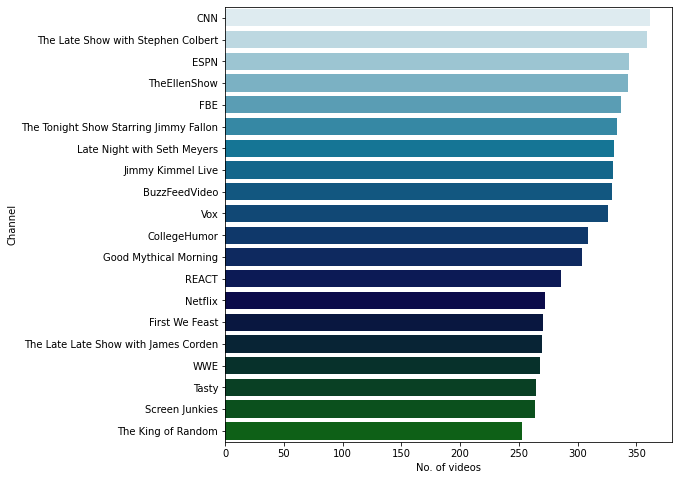

In [35]:
cdf = video.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,palette=('ocean_r'), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [36]:
channel_df = video.groupby(video['channel_title']).agg({'likes': ['sum'],
                                                           'dislikes': ['sum'],
                                                           'views': ['sum']})
channel_df.columns = ['likes', 'dislikes', 'views']

channel_df.sort_values(by=["dislikes"], ascending=False).head(10)

,likes,dislikes,views
channel_title,,,
YouTube Spotlight,37052919,19822612,1427365245
Logan Paul Vlogs,51137633,16301147,726829659
ChildishGambinoVEVO,111294734,6744382,4170263834
Call of Duty,13265756,6131935,356061575
Jake Paul,11971490,5868724,285300076
ibighit,249506995,4380237,2747474597
TaylorSwiftVEVO,57563971,3090327,1385634287
jypentertainment,51522885,2871396,1641707189
ArianaGrandeVevo,61867438,2250200,1737774086


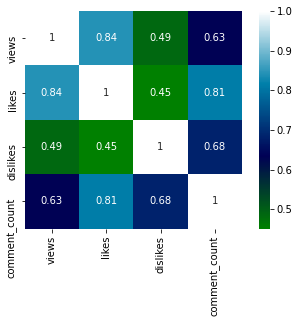

In [37]:
numerical_cols = ['views','likes','dislikes','comment_count']
sns.heatmap(video[numerical_cols].corr(),square=True,annot=True,cmap='ocean');

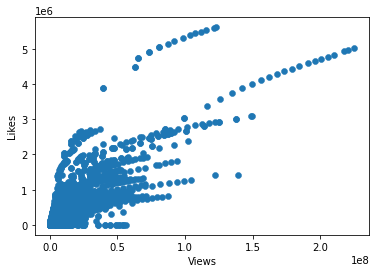

In [38]:
fig, ax = plt.subplots()
show_views = plt.scatter(x=video['views'], y=video['likes'], linewidths=0.5)
show_views = ax.set(xlabel="Views", ylabel="Likes")

In [39]:
rep_channel = video.groupby('channel_title')[['views']].sum().reset_index()
rep_channel.sort_values(by='views',inplace=True,ascending=False)

<Figure size 432x288 with 0 Axes>

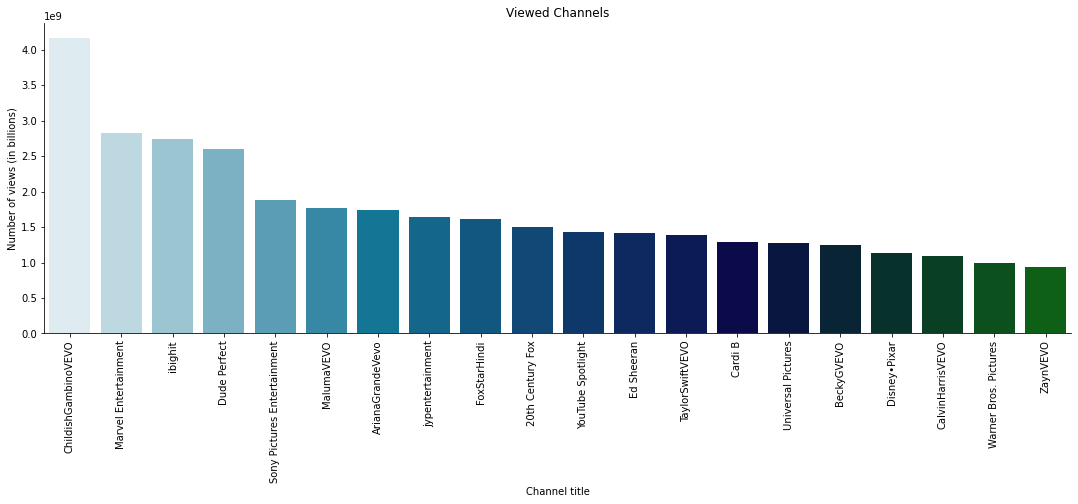

In [40]:
plt.clf()
channel_views = rep_channel.head(20)
sns.catplot(x='channel_title',y='views',data=channel_views,kind='bar', palette=('ocean_r'),aspect=3)
plt.xticks(rotation=90)
plt.xlabel('Channel title')
plt.ylabel('Number of views (in billions)')
plt.title('Viewed Channels')
plt.show()

Video error or removal ratio?

In [41]:
video["video_error_or_removed"].value_counts()

False    81780
True        50
Name: video_error_or_removed, dtype: int64

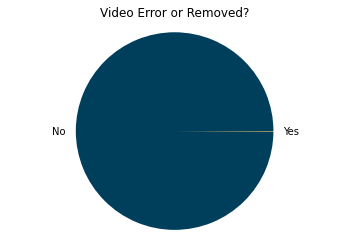

In [42]:
value_counts = video["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
counts= ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
counts = ax.axis('equal')
counts = ax.set_title('Video Error or Removed?')

 Are comments disabled?

In [43]:
video["comments_disabled"].value_counts(normalize=True)

False    0.98514
True     0.01486
Name: comments_disabled, dtype: float64

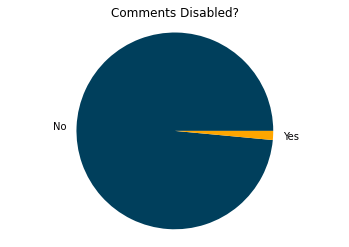

In [44]:
value_counts = video["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
counts_= ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
counts_= ax.axis('equal')
counts_= ax.set_title('Comments Disabled?')

Which country gets the most popular video trend and not trend ?

In [45]:
video['video_type'].value_counts()

not Trend    68131
Trending     13699
Name: video_type, dtype: int64

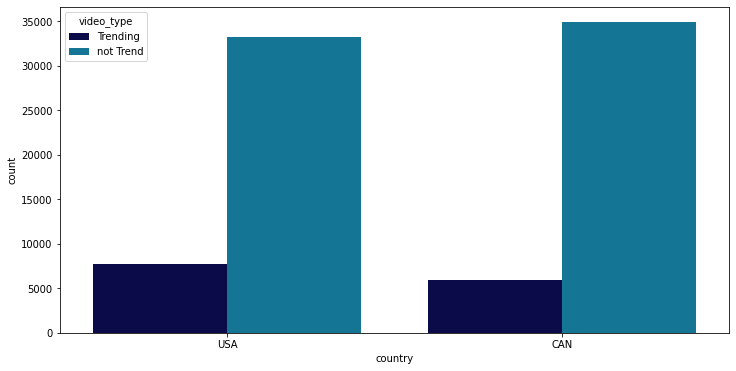

In [46]:
video.groupby(['country', 'video_type'])['views'].sum()
sns.countplot(data = video, x='country', hue='video_type', palette=('ocean'))
plt.gcf().set_size_inches(12,6)

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category_id', ylabel='count'>

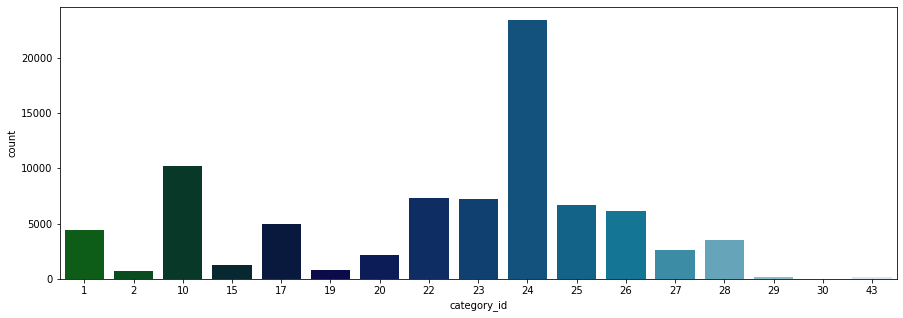

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(video['category_id'],palette='ocean')

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


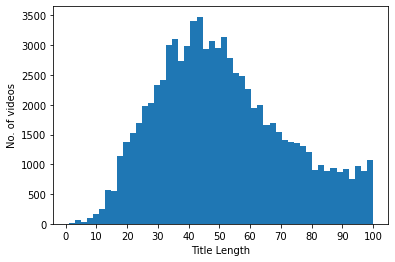

In [48]:
video["title_length"] = video["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
title_len = sns.distplot(video["title_length"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
title_len = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

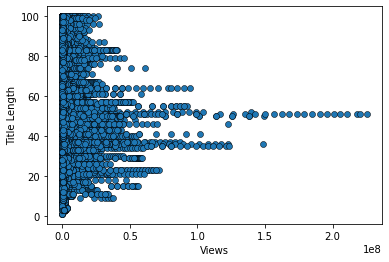

In [49]:
fig, ax = plt.subplots()
number_views= ax.scatter(x=video['views'], y=video['title_length'], edgecolors="#000000", linewidths=0.5)
number_views = ax.set(xlabel="Views", ylabel="Title Length")

In [50]:
title_words = list(video["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 24118),
 ('|', 23259),
 ('The', 10929),
 ('the', 6108),
 ('2018', 5378),
 ('&', 4310),
 ('to', 4246),
 ('of', 4112),
 ('in', 3973),
 ('a', 3845),
 ('A', 3644),
 ('and', 3616),
 ('on', 2935),
 ('I', 2878),
 ('with', 2855),
 ('Video)', 2827),
 ('Trailer', 2738),
 ('To', 2713),
 ('Official', 2484),
 ('Episode', 2422),
 ('(Official', 2371),
 ('How', 2283),
 ('You', 2143),
 ('2017', 1885),
 ('In', 1873)]

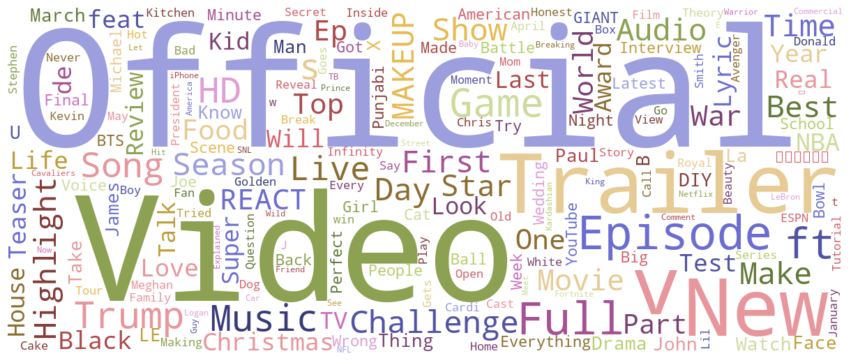

In [51]:
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Check null values

In [52]:
video.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1866
country                      0
trending_Year                0
trending_Day                 0
trending_Month               0
publish_hour                 0
publish_year                 0
publish_Month                0
score                        0
video_type                   0
video_type_no                0
title_length                 0
dtype: int64

In [53]:
video.nunique()

video_id                  28512
trending_date               205
title                     28748
channel_title              6251
category_id                  17
publish_time              27440
tags                      24038
views                     75352
likes                     42785
dislikes                  10008
comment_count             16760
thumbnail_link            28507
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               26898
country                       2
trending_Year                 2
trending_Day                 31
trending_Month                8
publish_hour                 24
publish_year                 12
publish_Month                12
score                     77324
video_type                    2
video_type_no                 2
title_length                100
dtype: int64

In [54]:
video.describe()

,category_id,views,likes,dislikes,comment_count,trending_Year,trending_Day,trending_Month,publish_hour,publish_year,publish_Month,score,title_length
count,81830.000000,8.183000e+04,8.183000e+04,8.183000e+04,8.183000e+04,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000,81830.000000
mean,20.383649,1.754415e+06,5.693911e+04,2.861005e+03,6.746303e+03,17.765465,15.855554,5.233521,13.788659,2017.733728,5.280313,311.337429,51.141586
std,7.194716,5.785451e+06,1.879156e+05,2.455480e+04,3.060427e+04,0.423710,8.849903,3.825740,6.563316,0.537253,3.884086,1873.842596,21.080640
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,17.000000,1.000000,1.000000,0.000000,2006.000000,1.000000,-40225.900887,1.000000
25%,17.000000,1.781945e+05,3.301000e+03,1.360000e+02,5.050000e+02,18.000000,8.000000,2.000000,10.000000,2017.000000,2.000000,6.254875,35.000000
50%,24.000000,4.961600e+05,1.283400e+04,4.380000e+02,1.550000e+03,18.000000,16.000000,4.000000,15.000000,2018.000000,4.000000,36.262489,48.000000
75%,24.000000,1.355388e+06,4.096175e+04,1.421000e+03,4.626000e+03,18.000000,23.000000,6.000000,19.000000,2018.000000,6.000000,158.669419,65.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,18.000000,31.000000,12.000000,23.000000,2018.000000,12.000000,73473.159904,100.000000


# Check duplicated values

In [55]:
video.duplicated().values.any()

True

In [56]:
video.duplicated().sum()

48

In [57]:
video = video.drop_duplicates()
video.shape

(81782, 27)

In [58]:
video.duplicated().values.any()

False

# Evaluation metrics  is: Recall

# Moudel

In [59]:
video_train, video_test = train_test_split(video, test_size=0.2,random_state=0)

In [60]:
video_train.shape

(65425, 27)

In [61]:
video_test.shape

(16357, 27)

### Cross-validation

In [62]:
X = video_train[['views','likes','dislikes','comment_count']]
y = video_train['video_type_no']

In [63]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 0)
X, y = oversample.fit_resample(X, y)

In [64]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= 1, n=54427 (50.0%)
Class= 0, n=54427 (50.0%)


# KNN

In [65]:
model1 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(model1, X, y, cv=5, n_jobs=-1, scoring='f1_macro')
print(scores)

[0.97780979 0.9777138  0.97642629 0.97619593 0.97886343]


In [66]:
print(scores.mean())

0.9774018481022922


## Logistic Regression

In [67]:
model2 = LogisticRegression() 
scores = cross_val_score(model2, X, y, cv=5, n_jobs=-1, scoring='f1_macro')
print(scores)

[0.61615169 0.59739364 0.60249422 0.60131549 0.60337928]


In [68]:
print(scores.mean())


0.6041468625563315
